# **加载数据集**

In [25]:
import os
import cv2
import numpy as np
import torchvision.transforms as transforms
from PIL import Image
from torchvision import datasets
from torch.utils.data import DataLoader,Dataset

In [40]:
data_dir = '../data/Cat vs Dog/train'

In [2]:
data_transform = transforms.Compose([
    transforms.Resize(223),
    transforms.CenterCrop(223),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.492, 0.461, 0.417], std=[0.256, 0.248, 0.251])
])

In [4]:
animals_dataset = datasets.ImageFolder(root = data_dir, transform=None)  # 没有经过数据增强

In [9]:
pre_animals_dataset = datasets.ImageFolder(root = data_dir, transform=data_transform)  # 经过数据增强

## **检测读取数据集** 

0
(500, 374)


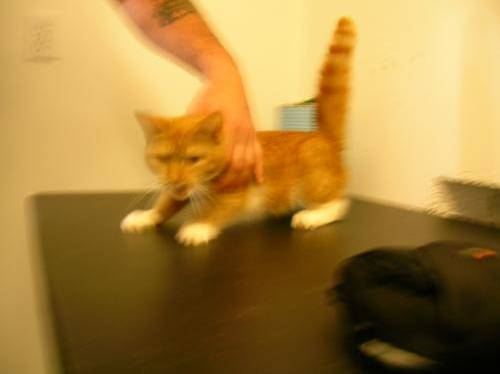

In [7]:
img, label = animals_dataset[0]
print(label)
print(img.size)
img

In [11]:
img, label = pre_animals_dataset[0]
print(label)
print(img.shape)
img

0
torch.Size([3, 223, 223])


tensor([[[ 1.8771,  1.8771,  1.8771,  ...,  1.8159,  1.8159,  1.8006],
         [ 1.8771,  1.8771,  1.8771,  ...,  1.8159,  1.8159,  1.8006],
         [ 1.8925,  1.8925,  1.8925,  ...,  1.8159,  1.8159,  1.8006],
         ...,
         [-1.8146, -1.7840, -1.7534,  ..., -1.0181, -1.0181, -0.9262],
         [-1.8300, -1.7993, -1.7840,  ..., -1.0487, -1.0487, -0.9568],
         [-1.8453, -1.8453, -1.8300,  ..., -1.0640, -1.0640, -0.9568]],

        [[ 1.7464,  1.7464,  1.7623,  ...,  1.3195,  1.3195,  1.3037],
         [ 1.7464,  1.7464,  1.7623,  ...,  1.3195,  1.3195,  1.3037],
         [ 1.7623,  1.7623,  1.7781,  ...,  1.3195,  1.3195,  1.3037],
         ...,
         [-1.7324, -1.7007, -1.6691,  ..., -1.1631, -1.1631, -1.0682],
         [-1.7482, -1.7166, -1.7007,  ..., -1.1947, -1.1947, -1.0999],
         [-1.7640, -1.7640, -1.7482,  ..., -1.2105, -1.2105, -1.0999]],

        [[ 0.7603,  0.7603,  0.7447,  ...,  0.2447,  0.2447,  0.2291],
         [ 0.7603,  0.7603,  0.7447,  ...,  0

##  **加载数据集**

In [12]:
dataset_loader = DataLoader(pre_animals_dataset, batch_size=4, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


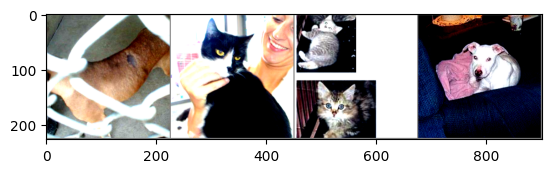

['狗', '猫', '猫', '狗']


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
dataiter = iter(dataset_loader)
imgs, labels = dataiter.next()
imshow(torchvision.utils.make_grid(imgs))
print(''.join('%s' % ['狗' if labels[j].item()==1 else '猫' for j in range(4)]))

# **划分数据集**

In [123]:
cats_train_dir = '../data/Cat vs Dog/train/cats'
dogs_train_dir = '../data/Cat vs Dog/train/dogs'
test_dir = '../data/Cat vs Dog/test'

cats_train_filenames = [os.path.join(cats_train_dir, f) for f in os.listdir(cats_train_dir)]
dogs_train_filenames = [os.path.join(dogs_train_dir, f) for f in os.listdir(dogs_train_dir)]

train_filenames = [*cats_train_filenames, *dogs_train_filenames]
test_filenames = [os.path.join(test_dir, f) for f in os.listdir(test_dir)]

['../data/Cat vs Dog/train/cats\\cat.0.jpg',
 '../data/Cat vs Dog/train/cats\\cat.1.jpg',
 '../data/Cat vs Dog/train/cats\\cat.10.jpg',
 '../data/Cat vs Dog/train/cats\\cat.100.jpg',
 '../data/Cat vs Dog/train/cats\\cat.1000.jpg',
 '../data/Cat vs Dog/train/cats\\cat.10000.jpg',
 '../data/Cat vs Dog/train/cats\\cat.10001.jpg',
 '../data/Cat vs Dog/train/cats\\cat.10002.jpg',
 '../data/Cat vs Dog/train/cats\\cat.10003.jpg',
 '../data/Cat vs Dog/train/cats\\cat.10004.jpg',
 '../data/Cat vs Dog/train/cats\\cat.10005.jpg',
 '../data/Cat vs Dog/train/cats\\cat.10006.jpg',
 '../data/Cat vs Dog/train/cats\\cat.10007.jpg',
 '../data/Cat vs Dog/train/cats\\cat.10008.jpg',
 '../data/Cat vs Dog/train/cats\\cat.10009.jpg',
 '../data/Cat vs Dog/train/cats\\cat.1001.jpg',
 '../data/Cat vs Dog/train/cats\\cat.10010.jpg',
 '../data/Cat vs Dog/train/cats\\cat.10011.jpg',
 '../data/Cat vs Dog/train/cats\\cat.10012.jpg',
 '../data/Cat vs Dog/train/cats\\cat.10013.jpg',
 '../data/Cat vs Dog/train/cats\\ca

In [82]:
train_transforms = transforms.Compose([
    transforms.Resize(223),
    transforms.CenterCrop(223),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.490, 0.482, 0.445], std=[0.240, 0.237, 0.257])
])

test_transforms = transforms.Compose([
    transforms.Resize(223),
    transforms.CenterCrop(223),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.490, 0.482, 0.445], std=[0.240, 0.237, 0.257])
])

In [98]:
class DogandCat(Dataset):
    def __init__(self, filenames, transforms):
        self.filenames = filenames
        self.transforms = transforms
        
    def __len__(self):
        return len(self.filenames)
    
    def __getitem__(self, idx):
        img = Image.open(self.filenames[idx])
        transformed_img = self.transforms(img)
        label = 0 if self.filenames[idx].split('\\')[-1].split('.')[0] == 'cat' else 1
        return transformed_img, label

In [115]:
# 划分训练集和验证集比例
num_filename = len(train_filenames)
valid_ratio = 0.2
num_train = int(num_filename * (1 - valid_ratio))

In [116]:
train_dataset = DogandCat(train_filenames[:num_train], train_transforms)
valid_dataset = DogandCat(train_filenames[num_train:], test_transforms)
test_dataset = DogandCat(test_filenames, test_transforms)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [117]:
img, label = train_dataset[0]
print(label)
print(img.shape)
img

0
torch.Size([3, 223, 223])


tensor([[[ 2.0106,  2.0106,  2.0106,  ...,  1.9453,  1.9453,  1.9289],
         [ 2.0106,  2.0106,  2.0106,  ...,  1.9453,  1.9453,  1.9289],
         [ 2.0270,  2.0270,  2.0270,  ...,  1.9453,  1.9453,  1.9289],
         ...,
         [-1.9273, -1.8946, -1.8619,  ..., -1.0776, -1.0776, -0.9796],
         [-1.9436, -1.9109, -1.8946,  ..., -1.1103, -1.1103, -1.0123],
         [-1.9600, -1.9600, -1.9436,  ..., -1.1266, -1.1266, -1.0123]],

        [[ 1.7389,  1.7389,  1.7554,  ...,  1.2921,  1.2921,  1.2756],
         [ 1.7389,  1.7389,  1.7554,  ...,  1.2921,  1.2921,  1.2756],
         [ 1.7554,  1.7554,  1.7720,  ...,  1.2921,  1.2921,  1.2756],
         ...,
         [-1.9014, -1.8683, -1.8352,  ..., -1.3057, -1.3057, -1.2064],
         [-1.9179, -1.8848, -1.8683,  ..., -1.3388, -1.3388, -1.2395],
         [-1.9345, -1.9345, -1.9179,  ..., -1.3553, -1.3553, -1.2395]],

        [[ 0.6336,  0.6336,  0.6184,  ...,  0.1301,  0.1301,  0.1148],
         [ 0.6336,  0.6336,  0.6184,  ...,  0

## **测试数据集**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


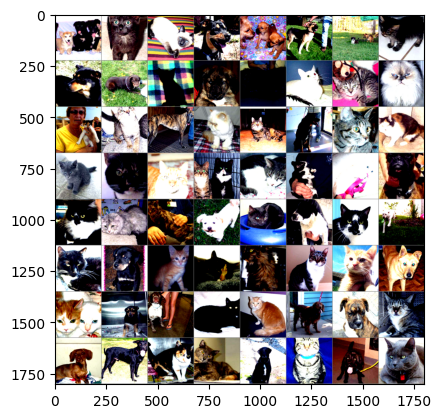

['狗', '猫', '猫', '狗', '狗', '狗', '狗', '猫', '狗', '狗', '猫', '狗', '狗', '猫', '猫', '猫', '猫', '猫', '狗', '猫', '猫', '狗', '猫', '猫', '猫', '猫', '猫', '猫', '猫', '猫', '猫', '狗', '猫', '猫', '猫', '狗', '猫', '狗', '猫', '狗', '猫', '狗', '猫', '猫', '猫', '猫', '猫', '狗', '猫', '狗', '狗', '猫', '猫', '狗', '狗', '猫', '狗', '狗', '猫', '猫', '狗', '猫', '狗', '猫']


In [118]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
dataiter = iter(train_loader)
imgs, labels = dataiter.next()
imshow(torchvision.utils.make_grid(imgs))
print(''.join('%s' % ['狗' if labels[j].item()==1 else '猫' for j in range(64)]))